## Creation of a database of DPTA 2 professional matches

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sa
import sqlite3
import warnings
import numpy as np
from sqlalchemy.types import *

In [2]:
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = 16, 9
warnings.filterwarnings("ignore")

In [3]:
engine = sa.create_engine('sqlite:///../pro_matches_database.db')

In [4]:
connection = engine.connect()

### Looking at the data

In [5]:
DATA_FOLDER = "../data/"

In [6]:
# Info about time of abilities upgrade in matches.
abilities = pd.read_csv(f"{DATA_FOLDER}abilities.tsv", sep="\t", index_col=0)
abilities.head()

,match_id,account_id,player_slot,hero_id,skill_upgrade_1,skill_upgrade_2,skill_upgrade_3,skill_upgrade_4,skill_upgrade_5,skill_upgrade_6,...,skill_upgrade_16,skill_upgrade_17,skill_upgrade_18,skill_upgrade_19,skill_upgrade_20,skill_upgrade_21,skill_upgrade_22,skill_upgrade_23,skill_upgrade_24,skill_upgrade_25
0,5981286393,137193239,0,54,5250,631.0,5250.0,631.0,5249.0,631.0,...,631.0,5252.0,452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5981286393,106863163,1,52,5243,5241.0,5243.0,5241.0,5243.0,5244.0,...,5244.0,5244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5981286393,139937922,2,129,6495,6583.0,6582.0,6583.0,6583.0,6598.0,...,6582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5981286393,101695162,3,120,6344,7307.0,6344.0,7307.0,6344.0,6343.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5981286393,108221389,4,103,5591,5589.0,5589.0,5591.0,5589.0,5594.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Info about Radiant (left side of DOTA map) advantages in gold and exp.
advantages = pd.read_csv(f"{DATA_FOLDER}advantages.tsv", sep="\t", index_col=0)
advantages.head()

,match_id,minute,gold_or_xp,value
0,5981286393,0,0,0
1,5981286393,1,0,-40
2,5981286393,2,0,86
3,5981286393,3,0,147
4,5981286393,4,0,858


In [8]:
# Info about events in chat (even bad words... because it's dota).
chat = pd.read_csv(f"{DATA_FOLDER}chat.tsv", sep="\t", index_col=0)
chat.head()

,match_id,time,type,key,slot,player_slot
0,5981286393,-69,chatwheel,18001,5,128.0
1,5981286393,-67,chatwheel,18001,5,128.0
2,5981286393,-55,chatwheel,71,7,130.0
3,5981286393,-41,chatwheel,37001,6,129.0
4,5981286393,-40,chatwheel,7,8,131.0


In [9]:
# Info about match events (Roshan, kills, etc.).
events = pd.read_csv(f"{DATA_FOLDER}events.tsv", sep="\t", index_col=0)
events.head()

,match_id,account_id,player_slot,hero_id,time,key,event
0,5981286393,137193239,0,54,431,npc_dota_hero_legion_commander,kill
1,5981286393,137193239,0,54,664,npc_dota_hero_warlock,kill
2,5981286393,137193239,0,54,743,npc_dota_hero_legion_commander,kill
3,5981286393,137193239,0,54,945,npc_dota_hero_skywrath_mage,kill
4,5981286393,137193239,0,54,1126,npc_dota_hero_legion_commander,kill


In [10]:
# Info about particular mathc: id, duration, result, league, etc.
matches = pd.read_csv(f"{DATA_FOLDER}matches.tsv", sep="\t", index_col=0)
matches.head()

,match_id,match_seq_num,patch,start_time,duration,game_mode,first_blood_time,barracks_status_dire,barracks_status_radiant,tower_status_dire,tower_status_radiant,dire_score,radiant_score,radiant_win,league_id,league_name,radiant_team_id,radiant_team_name,dire_team_id,dire_team_name
0,5981286393,5011253584,48,1620296316,1602,2,265,59,63,1796,1983,11,23,True,12929,i-联赛,8204512.0,Elephant,6209166.0,Team Aster
1,5981262647,5011241669,48,1620295215,1417,2,171,51,63,1988,1983,4,23,True,13108,DPC 2021 Season 2 Upper League (SEA) presented...,8360138.0,OB.Neon,8222896.0,Ωmega Esports
2,5981259364,5011250847,48,1620294908,2671,2,234,62,63,1792,1982,13,37,True,13117,ESL One DPC Eastern Europe Season 2 Lower Divi...,8352473.0,Fantastic Five,8360733.0,Trident Clan
3,5981243108,5011224404,48,1620293732,1982,2,248,2,63,1536,1982,12,33,True,12780,Moon Studio Asia,8272008.0,Crocodile,2640025.0,iG.Vitality
4,5981217610,5011215202,48,1620292185,2777,2,318,59,11,1796,1536,21,18,False,12929,i-联赛,8204512.0,Elephant,6209166.0,Team Aster


In [11]:
# Info about objectives: couriers dies, building kills, etc.
objectives = pd.read_csv(f"{DATA_FOLDER}objectives.tsv", sep="\t", index_col=0)
objectives.head()

,match_id,time,type,unit,key,slot,player_slot
0,5981286393,68,CHAT_MESSAGE_COURIER_LOST,NaN,NaN,NaN,NaN
1,5981286393,266,CHAT_MESSAGE_FIRSTBLOOD,NaN,8,1.0,1.0
2,5981286393,528,building_kill,npc_dota_hero_leshrac,npc_dota_badguys_tower1_mid,1.0,1.0
3,5981286393,691,building_kill,npc_dota_hero_life_stealer,npc_dota_badguys_tower1_top,0.0,0.0
4,5981286393,711,building_kill,npc_dota_creep_badguys_ranged,npc_dota_goodguys_tower1_bot,NaN,NaN


In [12]:
# Info about players actions.
players = pd.read_csv(f"{DATA_FOLDER}players.tsv", sep="\t", index_col=0)
players.head()

,match_id,player_slot,account_id,hero_id,kills,deaths,assists,last_hits,denies,gold_per_min,...,item_5,camps_stacked,creeps_stacked,obs_placed,sen_placed,purchase_tpscroll,rune_pickups,roshans_killed,towers_killed,win
0,5981286393,0,137193239,54,10,0,3,205,17,630,...,154,1.0,2.0,0.0,0.0,2.0,0.0,0.0,4.0,1
1,5981286393,1,106863163,52,8,5,8,213,13,597,...,48,2.0,8.0,2.0,0.0,1.0,11.0,1.0,1.0,1
2,5981286393,2,139937922,129,3,1,10,155,10,448,...,116,1.0,2.0,0.0,0.0,2.0,6.0,0.0,1.0,1
3,5981286393,3,101695162,120,1,2,12,50,0,271,...,0,1.0,3.0,4.0,0.0,3.0,4.0,0.0,0.0,1
4,5981286393,4,108221389,103,1,3,15,24,2,277,...,0,2.0,6.0,6.0,22.0,NaN,6.0,0.0,0.0,1


In [13]:
# Info about wards.
wards = pd.read_csv(f"{DATA_FOLDER}wards.tsv", sep="\t", index_col=0)
wards.head()

,match_id,account_id,player_slot,hero_id,time,x,y,type
0,5981286393,106863163,1,52,-62,122,118,0
1,5981286393,106863163,1,52,381,140,134,0
2,5981286393,101695162,3,120,-49,84,170,0
3,5981286393,101695162,3,120,289,116,164,0
4,5981286393,101695162,3,120,706,162,132,0


In [14]:
# Hero id to hero name
ids_to_names = pd.read_csv(f"{DATA_FOLDER}names_to_ids.tsv", sep="\t", index_col=0)
ids_to_names.head()
ids_to_names.columns = ["hero_name", "hero_id"]
ids_to_names = ids_to_names.iloc[:, [1, 0]]

### Database creation

In [15]:
metadata = sa.schema.MetaData(bind=connection)

In [16]:
def get_columns(data):
    data_columns = []
    for col in data.columns.values:
        if data[col].dtype == "int":
            data_columns.append(sa.Column(col, INT(), nullable=True))
        elif data[col].dtype == "bool":
            data_columns.append(sa.Column(col, BOOLEAN(), nullable=True))
        elif data[col].dtype == "float":
            data_columns.append(sa.Column(col, FLOAT(), nullable=True))
        elif data[col].dtype == "object":
            data_columns.append(sa.Column(col, VARCHAR(60), nullable=True))
    return data_columns

In [17]:
# Create table for matches dataset
matches_columns = []
for col in matches.columns.values:
    if col == "match_id":
        matches_columns.append(sa.Column(col, INT(), sa.ForeignKey(f"abilities.{col}"),
                                                     sa.ForeignKey(f"advantages.{col}"),
                                                     sa.ForeignKey(f"chat.{col}"),
                                                     sa.ForeignKey(f"events.{col}"),
                                                     sa.ForeignKey(f"objectives.{col}"),
                                                     sa.ForeignKey(f"players.{col}"),
                                                     sa.ForeignKey(f"wards.{col}"),
                               primaty_key=True, autoincrement=True))
    elif matches[col].dtype == "int":
        matches_columns.append(sa.Column(col, INT(), nullable=True))
    elif matches[col].dtype == "bool":
        matches_columns.append(sa.Column(col, BOOLEAN(), nullable=True))
    elif matches[col].dtype == "float":
        matches_columns.append(sa.Column(col, FLOAT(), nullable=True))
    elif matches[col].dtype == "object":
        matches_columns.append(sa.Column(col, VARCHAR(60), nullable=True))

In [18]:
matches_table = sa.Table("matches", metadata, *matches_columns)

In [19]:
# Create table for hero id to name transfer
names_table = sa.Table("id_to_name", metadata, sa.Column("hero_id", INT(), sa.ForeignKey("abilities.hero_id"),
                                                                           sa.ForeignKey("events.hero_id"),
                                                                           sa.ForeignKey("players.hero_id"),
                                                                           sa.ForeignKey("wards.hero_id"),
                                                         primary_key=True, autoincrement=True),
                                               sa.Column("hero_name", VARCHAR(20), nullable=True))

In [20]:
# Create table for abilities dataset
abilities_table = sa.Table("abilities", metadata, *get_columns(abilities))

In [21]:
# Create table for advantages dataset
advantages_table = sa.Table("advantages", metadata, *get_columns(advantages))

In [22]:
# Create table for chat dataset
chat_table = sa.Table("chat", metadata, *get_columns(chat))

In [23]:
# Create table for events dataset
events_table = sa.Table("events", metadata, *get_columns(events))

In [24]:
# Create table for objectives dataset
objectives_table = sa.Table("objectives", metadata, *get_columns(objectives))

In [25]:
# Create table for players dataset
players_table = sa.Table("players", metadata, *get_columns(players))

In [26]:
# Create table for wards dataset
wards_table = sa.Table("wards", metadata, *get_columns(wards))

In [27]:
# Tables creation
matches_table.create(checkfirst=True)
abilities_table.create(checkfirst=True)
advantages_table.create(checkfirst=True)
chat_table.create(checkfirst=True)
events_table.create(checkfirst=True)
objectives_table.create(checkfirst=True)
players_table.create(checkfirst=True)
wards_table.create(checkfirst=True)

In [28]:
names_table.create(checkfirst=True)

Filling tables

In [29]:
def fill_table(data, data_table, connection):
    with connection.begin():
        for _, row in data.iterrows():
            connection.execute(data_table.insert(), row.to_dict())

In [30]:
with connection.begin(): 
    for _, row in matches.iterrows():
        connection.execute(matches_table.insert(), row.to_dict())

In [31]:
fill_table(abilities, abilities_table, connection)

In [32]:
fill_table(advantages, advantages_table, connection)

In [33]:
fill_table(chat, chat_table, connection)

In [34]:
fill_table(events, events_table, connection)

In [35]:
fill_table(objectives, objectives_table, connection)

In [36]:
fill_table(players, players_table, connection)

In [37]:
fill_table(wards, wards_table, connection)

In [38]:
fill_table(ids_to_names, names_table, connection)

### Example requests

In [39]:
pd.DataFrame(connection.execute("SELECT * from advantages").fetchmany(5), columns=advantages.columns)

,match_id,minute,gold_or_xp,value
0,5981286393,0,0,0
1,5981286393,1,0,-40
2,5981286393,2,0,86
3,5981286393,3,0,147
4,5981286393,4,0,858


In [40]:
QUERY = """
SELECT * FROM events
JOIN matches ON events.match_id = matches.match_id
ORDER BY match_id ASC
"""

In [41]:
pd.DataFrame(connection.execute(QUERY).fetchmany(5), columns=np.concatenate((events.columns, matches.columns)))

,match_id,account_id,player_slot,hero_id,time,key,event,match_id,match_seq_num,patch,...,tower_status_radiant,dire_score,radiant_score,radiant_win,league_id,league_name,radiant_team_id,radiant_team_name,dire_team_id,dire_team_name
0,5946646053,104334048,0,85,500,npc_dota_hero_dazzle,kill,5946646053,4984701277,48,...,1982,21,33,1,12938,Positive Fire Games,8215803.0,Сascade Esports,8375518.0,Family Team
1,5946646053,104334048,0,85,1007,npc_dota_hero_troll_warlord,kill,5946646053,4984701277,48,...,1982,21,33,1,12938,Positive Fire Games,8215803.0,Сascade Esports,8375518.0,Family Team
2,5946646053,104334048,0,85,1233,npc_dota_hero_dazzle,kill,5946646053,4984701277,48,...,1982,21,33,1,12938,Positive Fire Games,8215803.0,Сascade Esports,8375518.0,Family Team
3,5946646053,104334048,0,85,602,5,rune,5946646053,4984701277,48,...,1982,21,33,1,12938,Positive Fire Games,8215803.0,Сascade Esports,8375518.0,Family Team
4,5946646053,104334048,0,85,901,5,rune,5946646053,4984701277,48,...,1982,21,33,1,12938,Positive Fire Games,8215803.0,Сascade Esports,8375518.0,Family Team


In [42]:
QUERY = """
SELECT * from players
JOIN id_to_name ON id_to_name.hero_id = players.hero_id
"""

In [43]:
heroes_ = pd.DataFrame(connection.execute(QUERY).fetchall(), columns=np.concatenate((players.columns, ids_to_names.columns)))

In [46]:
heroes_.head()

,match_id,player_slot,account_id,hero_id,kills,deaths,assists,last_hits,denies,gold_per_min,...,creeps_stacked,obs_placed,sen_placed,purchase_tpscroll,rune_pickups,roshans_killed,towers_killed,win,hero_id,hero_name
0,5981286393,0,137193239,54,10,0,3,205,17,630,...,2.0,0.0,0.0,2.0,0.0,0.0,4.0,1,54,life_stealer
1,5981286393,1,106863163,52,8,5,8,213,13,597,...,8.0,2.0,0.0,1.0,11.0,1.0,1.0,1,52,leshrac
2,5981286393,4,108221389,103,1,3,15,24,2,277,...,6.0,6.0,22.0,NaN,6.0,0.0,0.0,1,103,elder_titan
3,5981286393,128,148215639,18,0,2,7,295,7,547,...,8.0,0.0,0.0,1.0,2.0,0.0,0.0,0,18,sven
4,5981286393,129,89423756,37,3,6,5,51,6,241,...,0.0,7.0,11.0,1.0,1.0,0.0,0.0,0,37,warlock


Seems like everything goes nice and we can somehow use this database for detailed analysis of pro DOTA2 matches (but not in this work :).

Lets see the most popular heroes

In [50]:
pick_rate = heroes_["hero_name"].value_counts() / 1000 * 100 # Pick rate in %

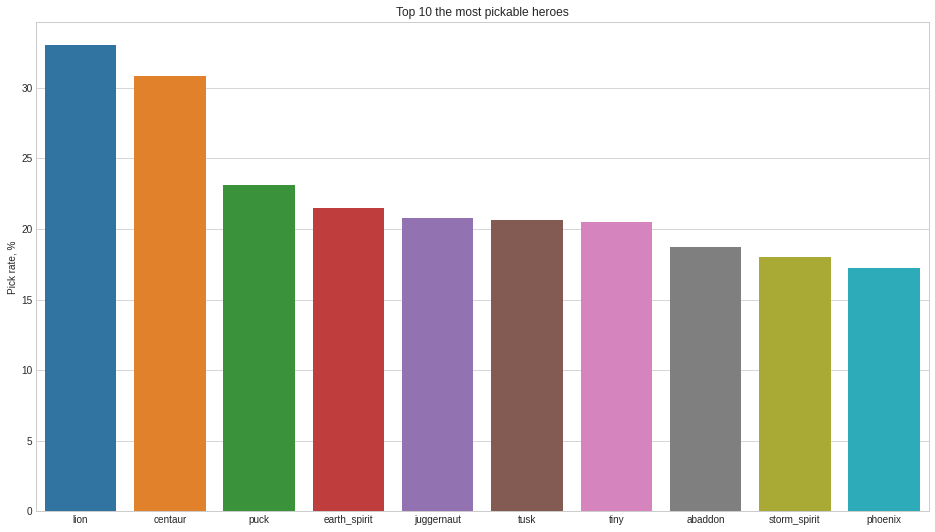

In [61]:
sns.barplot(x=pick_rate.index[range(10)], y=pick_rate.values[range(10)])
plt.title("Top 10 the most pickable heroes")
plt.ylabel("Pick rate, %")
plt.show()

In [73]:
win_rate = heroes_.groupby("hero_name").agg({"win": np.mean}).sort_values(by="win", ascending=False)

In [79]:
sum(win_rate["win"] > 0.5)

55

Less than half of heroes have win rate more than 50%. In some detailed analysis it may be interesting to combine info about win and pick rate and also about particular players.

In [90]:
kills = heroes_.groupby("hero_name").agg({"kills": np.mean})

In [91]:
deaths = heroes_.groupby("hero_name").agg({"deaths": np.mean})

59 heroes have positive KDA (average)

In [96]:
pos_kda = sum(kills.values > deaths.values)[0]
pos_kda

59

In [97]:
heroes_

,match_id,player_slot,account_id,hero_id,kills,deaths,assists,last_hits,denies,gold_per_min,...,creeps_stacked,obs_placed,sen_placed,purchase_tpscroll,rune_pickups,roshans_killed,towers_killed,win,hero_id,hero_name
0,5981286393,0,137193239,54,10,0,3,205,17,630,...,2.0,0.0,0.0,2.0,0.0,0.0,4.0,1,54,life_stealer
1,5981286393,1,106863163,52,8,5,8,213,13,597,...,8.0,2.0,0.0,1.0,11.0,1.0,1.0,1,52,leshrac
2,5981286393,4,108221389,103,1,3,15,24,2,277,...,6.0,6.0,22.0,NaN,6.0,0.0,0.0,1,103,elder_titan
3,5981286393,128,148215639,18,0,2,7,295,7,547,...,8.0,0.0,0.0,1.0,2.0,0.0,0.0,0,18,sven
4,5981286393,129,89423756,37,3,6,5,51,6,241,...,0.0,7.0,11.0,1.0,1.0,0.0,0.0,0,37,warlock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,5946646053,4,165571447,20,2,5,18,120,8,446,...,0.0,0.0,0.0,2.0,3.0,0.0,3.0,1,20,vengefulspirit
8562,5946646053,128,72393079,74,4,4,7,136,7,437,...,7.0,2.0,0.0,2.0,2.0,0.0,0.0,0,74,invoker
8563,5946646053,129,296702734,96,1,8,13,117,19,343,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,96,centaur
8564,5946646053,130,165390194,95,9,5,3,194,11,523,...,0.0,0.0,0.0,NaN,2.0,0.0,1.0,0,95,troll_warlord


In [103]:
unique_heroes = heroes_.groupby("account_id").agg({"hero_name": lambda x: x.nunique(), "match_id": lambda x: x.nunique()})
unique_heroes.columns = ["Unique_heroes", "Played_matches"]
unique_heroes

,Unique_heroes,Played_matches
account_id,,
88470,10,16
5150808,4,6
7910302,3,8
7932121,2,2
9403474,6,11
...,...,...
1191702062,2,2
1194328906,1,2
1196062354,3,5


#### Using these data we can do lots of things (even predict winner of some match). Also code for mining data can be used for creating application for constant replenishment of the database with new matches